# LBP (Local Binary Pattern)影像處理範例

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1186%2F1687-6180-2014-182/MediaObjects/13634_2014_Article_725_Fig2_HTML.jpg" width=640></img><br>


In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

### 定義LBP函式

In [2]:
#dist_img=lbp(src_img)
#dist_img:輸出影像
#src_img:輸入影像(只接受灰階圖)


def lbp(img):
    assert(len(img.shape) == 2) # 只接受灰階影像
    ret = np.zeros_like(img)
    
    img = cv.copyMakeBorder(img, 1, 1, 1, 1, cv.BORDER_REPLICATE)
    
    for y in range(1, img.shape[0] - 1):
        for x in range(1, img.shape[1] - 1):
            center = img[y][x]
            pixel = 0
            pixel |= (img[y - 1][x - 1] >= center) << 0
            pixel |= (img[y - 1][x + 0] >= center) << 1
            pixel |= (img[y - 1][x + 1] >= center) << 2
            pixel |= (img[y + 0][x + 1] >= center) << 3
            pixel |= (img[y + 1][x + 1] >= center) << 4
            pixel |= (img[y + 1][x + 0] >= center) << 5
            pixel |= (img[y + 1][x - 1] >= center) << 6
            pixel |= (img[y + 0][x - 1] >= center) << 7
            
            ret[y-1][x-1] = pixel
    return ret

### 定義showHist函式，在matplotlib上show<span style="color:red">圖表</span>

In [3]:
#定義showHist函式，可以用matplotlib來show圖表
#showHist(hist,title_name,x_label='Bins',y_label='# of Pixels',sub_row=1,sub_col=1,sub_num=1)
#hist:要show的圖表
#tiltle_name:圖表的標題
#x_label:x軸的標題
#x_label:y軸的標題
#sub_row:對應到 plt.subplot中的 row參數，預設為 1
#sub_col:對應到 plt.subplot中的 col參數，預設為 1
#sub_num:對應到 plt.subplot中的 plotNum參數，預設為 1
#y_limit:為x軸最大值，預設為 None。

def showHist(hist,title_name="",x_label='Bins',y_label='# of Pixels',sub_row=1,sub_col=1,sub_num=1,y_limit=None):
    plt.subplot(sub_row,sub_col,sub_num)
    #hist[255]=0
    plt.plot(hist)
    #plt.ylim([0, 2500])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title_name)
    plt.xlim([0, len(hist)])
    if y_limit!=None:
        plt.ylim([0, y_limit])




### 定義showImage函式，在matplotlib來show<span style="color:red">圖</span>

In [4]:
#定義showImage函式，可以用matplotlib來show圖
#showImage(image,title_name,sub_row=1,sub_col=1,sub_num=1)
#image:要show的圖
#tiltle_name:圖的標題
#sub_row:對應到 plt.subplot中的 row參數，預設為 1
#sub_col:對應到 plt.subplot中的 col參數，預設為 1
#sub_num:對應到 plt.subplot中的 plotNum參數，預設為 1

def showImage(image,title_name="",sub_row=1,sub_col=1,sub_num=1):
    '''
    在jupyter中使用matplotlib直接顯示圖片在記事本中
    ''' 
    plt.subplot(sub_row,sub_col,sub_num)  
    plt.title(title_name)
    

    # OpenCV的彩色影像 需轉成RGB順序
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        plt.axis('off') 
        plt.imshow(image)
    # OpenCV的灰階影像 需要特別調整 plt.imshow 的參數
    if len(image.shape) == 2:
        plt.axis('off') 
        plt.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
    
    # OpenCV的透明像素點的彩色影像 需轉成RGB順序
    if len(image.shape) == 3 and image.shape[2] == 4:
        image = cv.cvtColor(image, cv.COLOR_BGRA2RGB)
        plt.axis('off') 
        plt.imshow(image)


### 定義transparentMask
回傳透明像素點的影像遮罩

<span style="color:red">(注意!!!這個函式只適用於__4通道__的影像，否則會回傳None)</span>

In [5]:
#transparentMask(src_img)
#src_img:輸入影像(必須為 4通道的影像)
#--------------------------------
#回傳:透明像素點的影像遮罩

def transparentMask(src_img):
    if src_img.shape[2]!=4:
        return None
    else:
        mask = np.zeros(src_img.shape[:2], dtype="uint8")
        for i in range(0,len(src_img)):
            for j in range(0,len(src_img[i])):
                #print(sign_without_background_img[i][j])
                if src_img[i][j][3]!=0:
                    mask[i][j]=255
        return mask

# 使用LBP運算原圖與經過去背圖片的特徵圖比較
---
## __1.__ 首先分別載入`./img`裡的交通號誌

這邊載入去背過後(意即具有透明像素`.png`影像檔)的影像中，
```python
cv.imread('with_transparent_img.png',cv.IMREAD_UNCHANGED)
   
 ```
 cv.imread的第二個參數必須為cv.IMREAD_UNCHANGED這樣OpenCV才可以在載入影像時，才會保留影像中的alpha通道(透明度通道)，否則會直接忽略只載入BGR三通道的影像。<span style="color:red">__另外值得注意的是OpenCV在載入這些透明的像素點時，當alpha通道值為0時，會將其與的BGR的三個通道會補值為0__</span>

In [6]:
ori_img=cv.imread('./img/sign.jpg')
#sign_without_background_img=cv.imread('./img/sign_without_background.png')
sign_without_background_img=cv.imread('./img/sign_without_background.png',cv.IMREAD_UNCHANGED)



## __2.__ 製作去背影像的背景遮罩

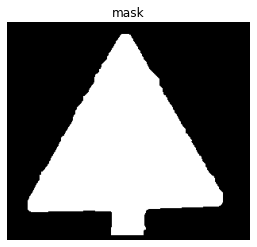

In [7]:
#mask=transparentMask(src_img)
#mask:輸出的透明影像遮罩
#src_img:輸入影像(必須為 4通道的影像)

mask=transparentMask(sign_without_background_img)
showImage(mask,"mask")

## __3.__ 接下來分別對這兩張做灰階轉換後再做 __lbp__<span style="color:blue"> (要記得丟進去的圖要轉為灰階喔!!!)</span>

In [8]:
gray_img=cv.cvtColor(ori_img,cv.COLOR_BGR2GRAY)
sign_without_background_gray_img=cv.cvtColor(sign_without_background_img,cv.COLOR_BGR2GRAY)

lbp_gray_img=lbp(gray_img)
lbp_sign_without_background_gray_img=lbp(sign_without_background_gray_img)

## __4.__ 將做好的lbp圖做成直方圖並比較結果

In [9]:
lbp_gray_hist = cv.calcHist([lbp_gray_img], [0], None, [256], [0, 256])

#這邊第三個參數要放入剛剛製作好的遮罩
lbp_sign_without_background_hist = cv.calcHist([lbp_sign_without_background_gray_img], [0], mask, [256], [0, 256])


## __5.__ 最後就把圖用matplotlib展示出來，並觀察其中的差別，與相似之處

### <span style="color:red">__!!!因為matplotlib 要 show 圖時計算的時間會有點久，所以需要等一下喔__~</span>

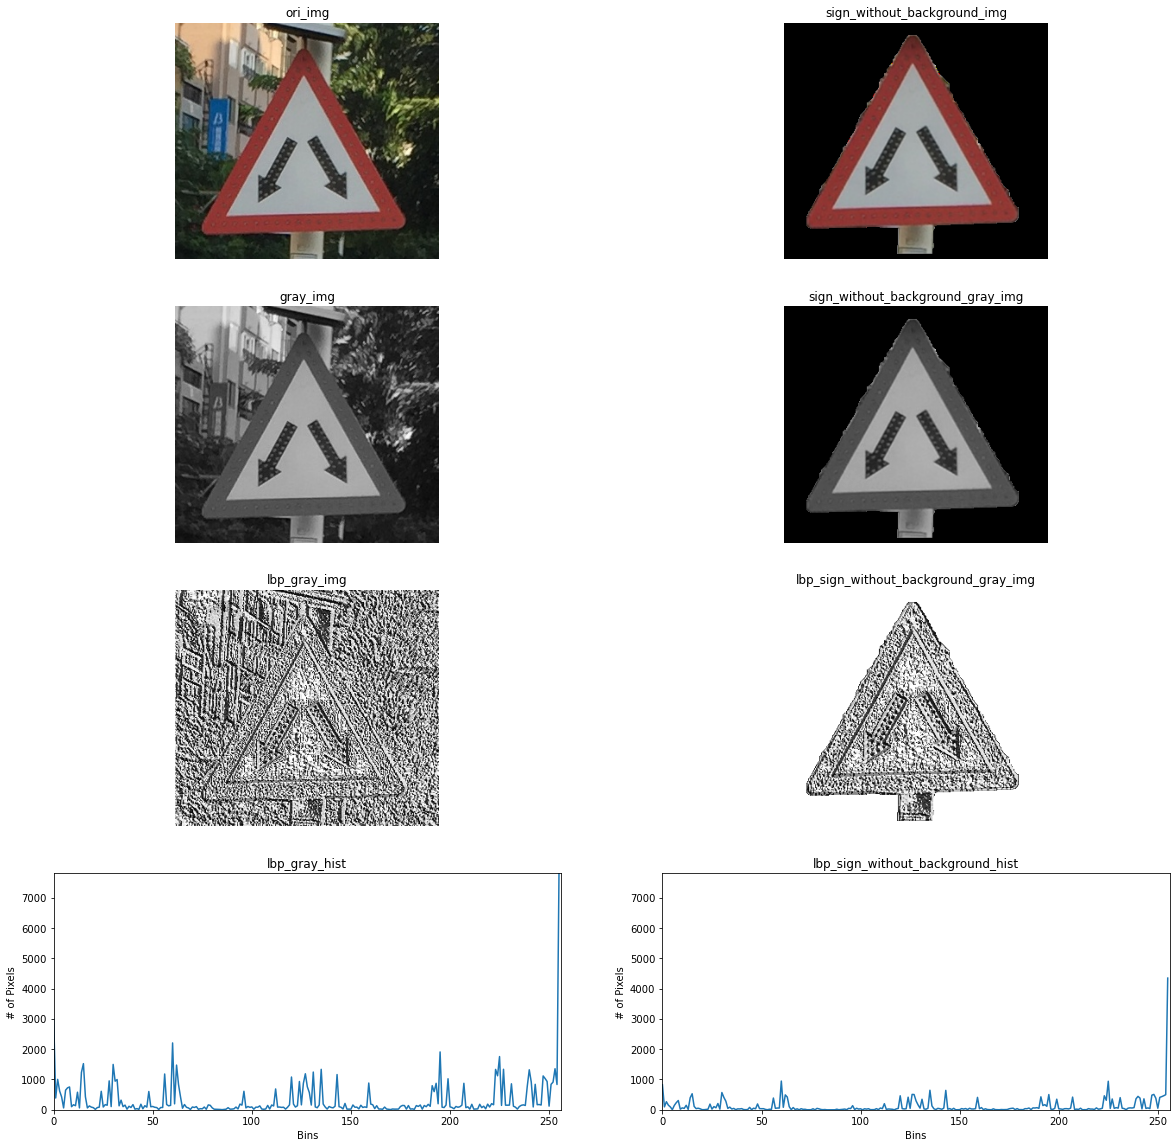

In [77]:
plt.figure(figsize=(20,20))

#將要顯示的圖顯示出來
showImage(ori_img,'ori_img',sub_row=4,sub_col=2,sub_num=1)
showImage(sign_without_background_img,'sign_without_background_img',sub_row=4,sub_col=2,sub_num=2)
showImage(gray_img,'gray_img',sub_row=4,sub_col=2,sub_num=3)
showImage(sign_without_background_gray_img,'sign_without_background_gray_img',sub_row=4,sub_col=2,sub_num=4)
showImage(lbp_gray_img,'lbp_gray_img',sub_row=4,sub_col=2,sub_num=5)
showImage(lbp_sign_without_background_gray_img,'lbp_sign_without_background_gray_img',sub_row=4,sub_col=2,sub_num=6)

#定義直方圖 y軸的極限值
y_limit=None

if max(lbp_gray_hist)>max(lbp_sign_without_background_hist):
    y_limit=max(lbp_gray_hist)
else:
    y_limit=max(lbp_sign_without_background_hist)
    

#顯示直方圖表
showHist(lbp_gray_hist,"lbp_gray_hist",sub_row=4,sub_col=2,sub_num=7,y_limit=y_limit)
showHist(lbp_sign_without_background_hist,"lbp_sign_without_background_hist",sub_row=4,sub_col=2,sub_num=8,y_limit=y_limit)


## __6.__ 最後將以上的直方圖做比較，顏色分別表示為

<span style="color:blue">藍色:</span>lbp_gray_hist

<span style="color:red">紅色:</span>lbp_sign_without_background_hist


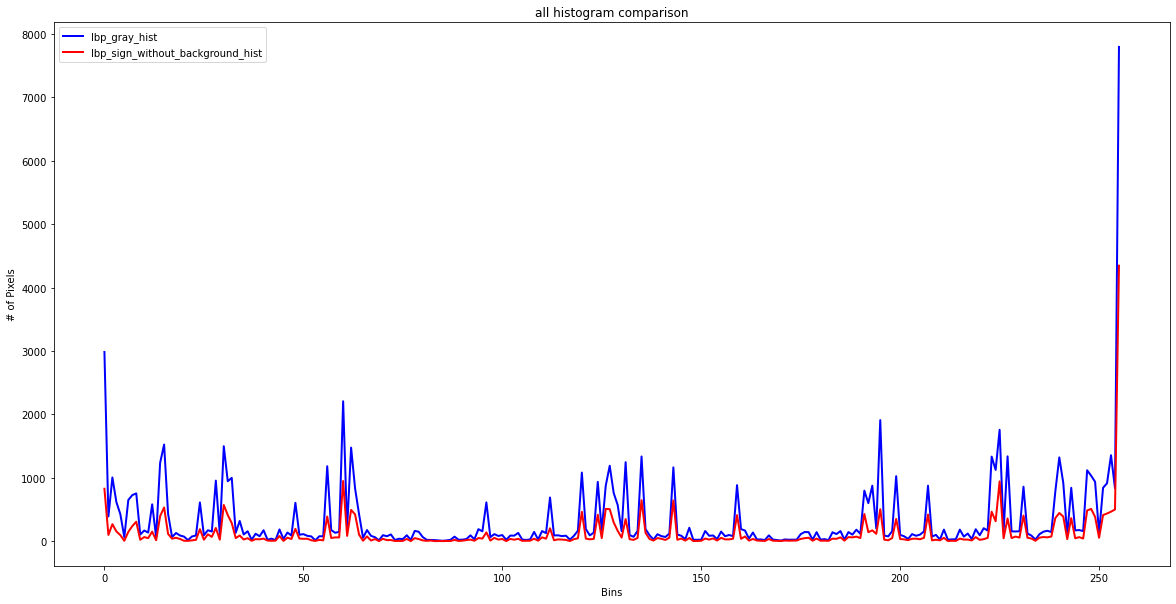

In [78]:
plt.figure(figsize=(20,10))

plt.plot(lbp_gray_hist, color='b', label='lbp_gray_hist',linewidth=2)
plt.plot(lbp_sign_without_background_hist, color='r', label='lbp_sign_without_background_hist',linewidth=2)

plt.xlabel('Bins')
plt.ylabel('# of Pixels')
plt.legend()
plt.title('all histogram comparison')
plt.show()